# **Deep-STORM 2D**

<font size = 4>Deep-STORM is a neural network capable of image reconstruction from high-density single-molecule localization microscopy (SMLM), first published in 2018 by [Nehme *et al.* in Optica](https://www.osapublishing.org/optica/abstract.cfm?uri=optica-5-4-458). This network allows image reconstruction of 2D super-resolution images, in a supervised training manner. The network is traiend using simulated high-density SMLM data for which the ground-truth is available. These simulations are obtained from random distribution of single molecules in a field-of-view and therefore do not imprint structural priors duting training. The network output a super-resolution image with increased pixel density (typically upsampling factor of 8 in each dimension). 

Deep-STORM has **two key advantages**:
- SMLM reconstruction at high density of emitters
- fast prediction (reconstruction) once the model is trained appropriately, compared to more common multi-emitter fitting processes.


---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is based on the following paper: 

<font size = 4>**Deep-STORM: super-resolution single-molecule microscopy by deep learning**, Optica (2018) by *Elias Nehme, Lucien E. Weiss, Tomer Michaeli, and Yoav Shechtman* (https://www.osapublishing.org/optica/abstract.cfm?uri=optica-5-4-458)

<font size = 4>And source code found in: https://github.com/EliasNehme/Deep-STORM


<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4> Deep-STORM is able to train on simulated dataset of SMLM data (see https://www.osapublishing.org/optica/abstract.cfm?uri=optica-5-4-458 for more info). Here, we provide a simulator that will generate training dataset (section 3.1.b). A few parameters will allow you to match the simulation to your experimental data. Similarly to what is described in the paper, simulations obtained from ThunderSTORM can also be loaded here (section 3.1.a).

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Initialise the Colab session**
---


## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*


In [1]:
#@markdown ##Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

# from tensorflow.python.client import device_lib 
# device_lib.list_local_devices()


TensorFlow 1.x selected.
You have GPU access
Mon May 18 08:54:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    31W / 250W |    265MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                               

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [2]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install Deep-STORM and dependencies**
---


In [3]:
#@markdown ##Install Deep-STORM and dependencies

# %% Model definition + helper functions

# Import keras modules and libraries
from keras.models import Model
from keras.layers import Input, Activation, UpSampling2D, Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import Callback
from keras import backend as K
from keras import optimizers
from keras import losses
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# Import common libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.io as sio
from os.path import abspath
from sklearn.model_selection import train_test_split
from skimage import io
import time
import os
import shutil
import csv
from PIL import Image
from PIL.TiffTags import TAGS
from scipy.ndimage import gaussian_filter
import math
from astropy.visualization import simple_norm
from sys import getsizeof

# For sliders and dropdown menu, progress bar
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm

# For Multi-threading in simulation
from numba import njit, prange


# # For memory management
# from __future__ import print_function
# from sys import getsizeof, stderr
# from itertools import chain
# from collections import deque
# try:
#   from reprlib import repr
# except ImportError:
#   pass

# # Gets the total Python object memory size
# def total_size(o, handlers={}, verbose=False):
#     """ Returns the approximate memory footprint an object and all of its contents.

#     Automatically finds the contents of the following builtin containers and
#     their subclasses:  tuple, list, deque, dict, set and frozenset.
#     To search other containers, add handlers to iterate over their contents:

#         handlers = {SomeContainerClass: iter,
#                     OtherContainerClass: OtherContainerClass.get_elements}

#     """
#     dict_handler = lambda d: chain.from_iterable(d.items())
#     all_handlers = {tuple: iter,
#                     list: iter,
#                     deque: iter,
#                     dict: dict_handler,
#                     set: iter,
#                     frozenset: iter,
#                    }
#     all_handlers.update(handlers)     # user handlers take precedence
#     seen = set()                      # track which object id's have already been seen
#     default_size = getsizeof(0)       # estimate sizeof object without __sizeof__

#     def sizeof(o):
#         if id(o) in seen:       # do not double count the same object
#             return 0
#         seen.add(id(o))
#         s = getsizeof(o, default_size)

#         if verbose:
#             print(s, type(o), repr(o))  ## , file=stderr)`

#         for typ, handler in all_handlers.items():
#             if isinstance(o, typ):
#                 s += sum(map(sizeof, handler(o)))
#                 break
#         return s

#     return sizeof(o)

# define a function that projects and rescales an image to the range [0,1]
def project_01(im):
    im = np.squeeze(im)
    min_val = im.min()
    max_val = im.max()
    return (im - min_val)/(max_val - min_val)

# normalize image given mean and std
def normalize_im(im, dmean, dstd):
    im = np.squeeze(im)
    im_norm = np.zeros(im.shape,dtype=np.float32)
    im_norm = (im - dmean)/dstd
    return im_norm

# Define the loss history recorder
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
#  Define a matlab like gaussian 2D filter
def matlab_style_gauss2D(shape=(7,7),sigma=1):
    """ 
    2D gaussian filter - should give the same result as:
    MATLAB's fspecial('gaussian',[shape],[sigma]) 
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h.astype(dtype=K.floatx())
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    h = h*2.0
    h = h.astype('float32')
    return h

# Expand the filter dimensions
psf_heatmap = matlab_style_gauss2D(shape = (7,7),sigma=1)
gfilter = tf.reshape(psf_heatmap, [7, 7, 1, 1])

# Combined MSE + L1 loss
def L1L2loss(input_shape):
    def bump_mse(heatmap_true, spikes_pred):

        # generate the heatmap corresponding to the predicted spikes
        heatmap_pred = K.conv2d(spikes_pred, gfilter, strides=(1, 1), padding='same')

        # heatmaps MSE
        loss_heatmaps = losses.mean_squared_error(heatmap_true,heatmap_pred)

        # l1 on the predicted spikes
        loss_spikes = losses.mean_absolute_error(spikes_pred,tf.zeros(input_shape))
        return loss_heatmaps + loss_spikes
    return bump_mse

# Define the concatenated conv2, batch normalization, and relu block
def conv_bn_relu(nb_filter, rk, ck, name):
    def f(input):
        conv = Convolution2D(nb_filter, kernel_size=(rk, ck), strides=(1,1),\
                               padding="same", use_bias=False,\
                               kernel_initializer="Orthogonal",name='conv-'+name)(input)
        conv_norm = BatchNormalization(name='BN-'+name)(conv)
        conv_norm_relu = Activation(activation = "relu",name='Relu-'+name)(conv_norm)
        return conv_norm_relu
    return f

# Define the model architechture
def CNN(input,names):
    Features1 = conv_bn_relu(32,3,3,names+'F1')(input)
    pool1 = MaxPooling2D(pool_size=(2,2),name=names+'Pool1')(Features1)
    Features2 = conv_bn_relu(64,3,3,names+'F2')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2),name=names+'Pool2')(Features2)
    Features3 = conv_bn_relu(128,3,3,names+'F3')(pool2)
    pool3 = MaxPooling2D(pool_size=(2, 2),name=names+'Pool3')(Features3)
    Features4 = conv_bn_relu(512,3,3,names+'F4')(pool3)
    up5 = UpSampling2D(size=(2, 2),name=names+'Upsample1')(Features4)
    Features5 = conv_bn_relu(128,3,3,names+'F5')(up5)
    up6 = UpSampling2D(size=(2, 2),name=names+'Upsample2')(Features5)
    Features6 = conv_bn_relu(64,3,3,names+'F6')(up6)
    up7 = UpSampling2D(size=(2, 2),name=names+'Upsample3')(Features6)
    Features7 = conv_bn_relu(32,3,3,names+'F7')(up7)
    return Features7

# Define the Model building for an arbitrary input size
def buildModel(input_dim):
    input_ = Input (shape = (input_dim))
    act_ = CNN (input_,'CNN')
    density_pred = Convolution2D(1, kernel_size=(1, 1), strides=(1, 1), padding="same",\
                                  activation="linear", use_bias = False,\
                                  kernel_initializer="Orthogonal",name='Prediction')(act_)
    model = Model (inputs= input_, outputs=density_pred)
    opt = optimizers.Adam(lr=0.001)
    model.compile(optimizer=opt, loss = L1L2loss(input_dim))
    return model


# define a function that trains a model for a given data SNR and density
def train_model(patches, heatmaps, modelPath, epochs, steps_per_epoch, batch_size, upsampling_factor=8):
    
    """
    This function trains a CNN model on the desired training set, given the 
    upsampled training images and labels generated in MATLAB.
    
    # Inputs
    # TO UPDATE ----------

    # Outputs
    function saves the weights of the trained model to a hdf5, and the 
    normalization factors to a mat file. These will be loaded later for testing 
    the model in test_model.    
    """
    
    # for reproducibility
    np.random.seed(123)

    X_train, X_test, y_train, y_test = train_test_split(patches, heatmaps, test_size=0.3, random_state=42)
    print('Number of Training Examples: %d' % X_train.shape[0])
    print('Number of Validation Examples: %d' % X_test.shape[0])
       
    # Setting type
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')

    #===================== Training set normalization ==========================
    # normalize training images to be in the range [0,1] and calculate the 
    # training set mean and std
    mean_train = np.zeros(X_train.shape[0],dtype=np.float32)
    std_train = np.zeros(X_train.shape[0], dtype=np.float32)
    for i in range(X_train.shape[0]):
        X_train[i, :, :] = project_01(X_train[i, :, :])
        mean_train[i] = X_train[i, :, :].mean()
        std_train[i] = X_train[i, :, :].std()

    # resulting normalized training images
    mean_val_train = mean_train.mean()
    std_val_train = std_train.mean()
    X_train_norm = np.zeros(X_train.shape, dtype=np.float32)
    for i in range(X_train.shape[0]):
        X_train_norm[i, :, :] = normalize_im(X_train[i, :, :], mean_val_train, std_val_train)
    
    # patch size
    psize = X_train_norm.shape[1]

    # Reshaping
    X_train_norm = X_train_norm.reshape(X_train.shape[0], psize, psize, 1)

    # ===================== Test set normalization ==========================
    # normalize test images to be in the range [0,1] and calculate the test set 
    # mean and std
    mean_test = np.zeros(X_test.shape[0],dtype=np.float32)
    std_test = np.zeros(X_test.shape[0], dtype=np.float32)
    for i in range(X_test.shape[0]):
        X_test[i, :, :] = project_01(X_test[i, :, :])
        mean_test[i] = X_test[i, :, :].mean()
        std_test[i] = X_test[i, :, :].std()

    # resulting normalized test images
    mean_val_test = mean_test.mean()
    std_val_test = std_test.mean()
    X_test_norm = np.zeros(X_test.shape, dtype=np.float32)
    for i in range(X_test.shape[0]):
        X_test_norm[i, :, :] = normalize_im(X_test[i, :, :], mean_val_test, std_val_test)
        
    # Reshaping
    X_test_norm = X_test_norm.reshape(X_test.shape[0], psize, psize, 1)

    # Reshaping labels
    Y_train = y_train.reshape(y_train.shape[0], psize, psize, 1)
    Y_test = y_test.reshape(y_test.shape[0], psize, psize, 1)


    # Set the dimensions ordering according to tensorflow consensous
    # K.set_image_dim_ordering('tf')
    K.set_image_data_format('channels_last')

    # Save the model weights after each epoch if the validation loss decreased
    checkpointer = ModelCheckpoint(filepath=os.path.join(modelPath,"weights_model.hdf5"), verbose=1,
                                   save_best_only=True)

    # Change learning when loss reaches a plataeu
    change_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00005)
    
    # Model building and complitation
    model = buildModel((psize, psize, 1))
    
    # Create an image data generator for real time data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0.,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.,  # randomly shift images vertically (fraction of total height)
        zoom_range=0.,
        shear_range=0.,
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        fill_mode='constant',
        data_format=K.image_data_format())

    # Fit the image generator on the training data
    datagen.fit(X_train_norm)
    
    # loss history recorder
    history = LossHistory()

    # Inform user training begun
    print('Training model...')

    # Fit model on the batches generated by datagen.flow()
    train_history = model.fit_generator(datagen.flow(X_train_norm, Y_train, batch_size=batch_size), \
                                        steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, \
                                        validation_data=(X_test_norm, Y_test), \
                                        callbacks=[history, checkpointer, change_lr])    

    # Inform user training ended
    print('Training Completed!')

    # convert the history.history dict to a pandas DataFrame:     
    lossData = pd.DataFrame(train_history.history) 

    if os.path.exists(os.path.join(modelPath,"Quality Control")):
      shutil.rmtree(os.path.join(modelPath,"Quality Control"))

    os.makedirs(os.path.join(modelPath,"Quality Control"))

    # The training evaluation.csv is saved (overwrites the Files if needed). 
    lossDataCSVpath = os.path.join(modelPath,"Quality Control/training_evaluation.csv")
    with open(lossDataCSVpath, 'w') as f:
      writer = csv.writer(f)
      writer.writerow(['loss','val_loss'])
      for i in range(len(train_history.history['loss'])):
        writer.writerow([train_history.history['loss'][i], train_history.history['val_loss'][i]])

    
    # Save datasets to a matfile to open later in matlab
    mdict = {"mean_test": mean_val_test, "std_test": std_val_test, "upsampling_factor": upsampling_factor}
    sio.savemat(os.path.join(modelPath,"model_metadata.mat"), mdict)
    return


def test_model(dataPath, filename, modelPath, savePath, debug=0, display=True):
    """
    This function tests a trained model on the desired test set, given the 
    tiff stack of test images, learned weights, and normalization factors.
    
    # Inputs (TO UPDATE ----------)
    datafile          - the tiff stack of test images 
    weights_file      - the saved weights file generated in train_model
    meanstd_file      - the saved mean and standard deviation file generated in train_model
    savename          - the filename for saving the recovered SR image
    upsampling_factor - the upsampling factor for reconstruction (default 8)
    debug             - boolean whether to save individual frame predictions (default 0)
    
    # Outputs
    function saves a mat file with the recovered image, and optionally saves 
    individual frame predictions in case debug=1. (default is debug=0)    
    """
    
    # load mean and std
    matfile = sio.loadmat(os.path.join(modelPath,"model_metadata.mat"))
    test_mean = np.array(matfile['mean_test'])
    test_std = np.array(matfile['std_test'])  
    upsampling_factor = np.array(matfile['upsampling_factor']) 
    upsampling_factor = upsampling_factor.item() # convert to scalar 

    # load the tiff data
    Images = io.imread(os.path.join(dataPath, filename))
    # get dataset dimensions
    (K, M, N) = Images.shape
    
    # upsampling using a simple nearest neighbor interp.
    Images_upsampled = np.zeros((K, M*upsampling_factor, N*upsampling_factor), dtype=np.float32)
    for i in range(Images.shape[0]):
        Images_upsampled[i,:,:] = np.kron(Images[i,:,:], np.ones((upsampling_factor,upsampling_factor)))   
    Images = Images_upsampled

    
    # upsampled frames dimensions
    (K, M, N) = Images.shape
    
    # Build the model for a bigger image
    model = buildModel((M, N, 1))

    # Load the trained weights
    model.load_weights(os.path.join(modelPath,'weights_model.hdf5'))
    
    # Normalize each sample by it's own mean and std
    Images_norm = np.zeros(Images.shape,dtype=np.float32)
    for i in range(Images.shape[0]):
        Images_norm[i,:,:] = project_01(Images[i,:,:])
        Images_norm[i,:,:] = normalize_im(Images_norm[i,:,:], test_mean, test_std)

    # Reshaping
    Images_norm = np.expand_dims(Images_norm,axis=3)
    print(Images_norm.shape)
    
    # Make a prediction and time it
    # start = time.time()
    predicted_density = model.predict(Images_norm, batch_size=1)
    # end = time.time()

    # threshold negative values
    predicted_density[predicted_density < 0] = 0
    
    # resulting sum images
    WideField = np.squeeze(np.sum(Images_norm, axis=0))
    Recovery = np.squeeze(np.sum(predicted_density, axis=0))
    
    if (display):
      # Look at the sum image
      f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
      ax1.imshow(WideField)
      ax1.set_title('Wide Field')
      ax1.axis('off')
      ax2.imshow(Recovery)
      ax2.set_title('Sum of Predictions')
      ax2.axis('off')
      f.subplots_adjust(hspace=0)
      plt.show()
    
    # Save predictions to a matfile to open later in matlab
    # mdict = {"Recovery": Recovery}
    # sio.savemat(savename+'Prediction.mat', mdict)
    # io.imsave(savename+'PredictionStack.tif', predicted_density)
    io.imsave(os.path.join(savePath, 'Predicted_'+os.path.splitext(filename)[0]+'.tif'),Recovery)

    # io.imsave(os.path.join(savePath, filename'Prediction.tif'), Recovery)
    io.imsave(os.path.join(savePath, 'Widefield_'+os.path.splitext(filename)[0]+'.tif'),WideField)
    # io.imsave(savePath+'Widefield.tif', WideField)

    # save predicted density in each frame for debugging purposes
    if debug:
        mdict = {"Predictions": predicted_density}
        sio.savemat(savename + '_debug_save.mat', mdict)
    
    return


def singleFramePrediction(dataPath, filename, modelPath, savePath):
    """
    This function tests a trained model on the desired test set, given the 
    tiff stack of test images, learned weights, and normalization factors.
    
    # Inputs
    dataPath          - the path to the folder containing the tiff stack(s) to run prediction on 
    filename          - the name of the file to process
    modelPath         - the path to the folder containing the weights file and the mean and standard deviation file generated in train_model
    savePath          - the path to the folder where to save the prediction
    upsampling_factor - the upsampling factor for reconstruction (default 8)    

    """
    
    # load mean and std
    matfile = sio.loadmat(os.path.join(modelPath,'model_metadata.mat'))
    test_mean = np.array(matfile['mean_test'])
    test_std = np.array(matfile['std_test'])  
    upsampling_factor = np.array(matfile['upsampling_factor'])
    upsampling_factor = upsampling_factor.item() # convert to scalar 


    # Read in the raw file
    Images = io.imread(os.path.join(dataPath, filename))
    # get dataset dimensions
    (nFrames, M, N) = Images.shape
    print('Input image is '+str(M)+'x'+str(N)+' with '+str(nFrames)+' frames.')

    # Build the model for a bigger image
    model = buildModel((upsampling_factor*M, upsampling_factor*N, 1))

    # Load the trained weights
    model.load_weights(os.path.join(modelPath,'weights_model.hdf5'))

    # Initialise the results
    Prediction = np.zeros((M*upsampling_factor, N*upsampling_factor), dtype=np.float32)
    Widefield = np.zeros((M*upsampling_factor, N*upsampling_factor), dtype=np.float32)

    for image in tqdm(Images):
      # upsampling using a simple nearest neighbor interp.
      Image_upsampled = np.zeros((M*upsampling_factor, N*upsampling_factor), dtype=np.float32)
      Image_upsampled = np.kron(image, np.ones((upsampling_factor,upsampling_factor)))

      # Normalization of the data
      Image_upsampled = normalize_im(project_01(Image_upsampled), test_mean, test_std)

      # Reshaping
      Image_upsampled = np.expand_dims(Image_upsampled,axis=0)
      Image_upsampled = np.expand_dims(Image_upsampled,axis=3)

      # Run prediction
      predicted_density = model.predict(Image_upsampled, batch_size=1)
      predicted_density[predicted_density < 0] = 0

      # Add to results
      Widefield += np.squeeze(Image_upsampled)
      Prediction += np.squeeze(predicted_density)

    # Save the prediction and widefield image
    io.imsave(os.path.join(savePath, 'Predicted_'+os.path.splitext(filename)[0]+'.tif'), Prediction)
    io.imsave(os.path.join(savePath, 'Widefield_'+os.path.splitext(filename)[0]+'.tif'), Widefield)
    
    return


# Multi-threaded Erf-based image construction
@njit(parallel=True)
def FromLoc2Image_MultiThreaded(xc_array, yc_array, photon_array, sigma_array, image_size = 64, pixel_size = 100):
  Image = np.zeros((image_size, image_size))
  for ij in prange(image_size*image_size):
    j = int(ij/image_size)
    i = ij - j*image_size
    for (xc, yc, photon, sigma) in zip(xc_array, yc_array, photon_array, sigma_array):
      # Don't bother if the emitter has photons <= 0 or if Sigma <= 0
      if (photon > 0) and (photon > 0):
        S = sigma*math.sqrt(2)
        x = i*pixel_size - xc
        y = j*pixel_size - yc
        # Don't bother if the emitter is further than 4 sigma from the centre of the pixel
        if (x+pixel_size/2)**2 + (y+pixel_size/2)**2 < 16*sigma**2:
          ErfX = math.erf((x+pixel_size)/S) - math.erf(x/S)
          ErfY = math.erf((y+pixel_size)/S) - math.erf(y/S)
          Image[j][i] += 0.25*photon*ErfX*ErfY
  return Image



def getPixelSizeTIFFmetadata(TIFFpath, display=False):
  with Image.open(TIFFpath) as img:
    meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.keys()}

  # TIFF tags
  # https://www.loc.gov/preservation/digital/formats/content/tiff_tags.shtml
  # https://www.awaresystems.be/imaging/tiff/tifftags/resolutionunit.html
  ResolutionUnit = meta_dict['ResolutionUnit'][0] # unit of resolution
  xResolution = meta_dict['XResolution'][0][0] # number of pixels / ResolutionUnit
  width = meta_dict['ImageWidth'][0]
  height = meta_dict['ImageLength'][0]

  if ResolutionUnit == 2:
    # Units given are in inches
    pixel_size = 0.025*1e9/xResolution
  elif ResolutionUnit == 3:
    # Units given are in cm
    pixel_size = 0.01*1e9/xResolution
  else: 
    # ResolutionUnit is therefore 1
    # Units are not determined and it is assumed it is in metres
    pixel_size = 1e9/xResolution

  if display:
    print('Pixel size obtained from metadata: '+str(pixel_size)+' nm')
  
  return (pixel_size, width, height)






print('--------------------------------')
print('DeepSTORM installation complete.')


--------------------------------
DeepSTORM installation complete.



# **3. Generate patches for training**
---

For Deep-STORM the training data can be obtained in two ways:
* Simulated using ThunderSTORM or other simulation tool and loaded here (**using Section 3.1.a**)
* Directly simulated in this notebook (**using Section 3.1.b**)


## **3.1.a Load training data**
---

Here you can load your simulated data along with its corresponding localization file.

In [4]:
#@markdown ##Load raw data

# Get user input
ImageData_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Artificial_dataset_demo2.tif" #@param {type:"string"}
LocalizationData_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/positions_demo2.csv" #@param {type: "string"}


# load the tiff data
Images = io.imread(ImageData_path)
# get dataset dimensions
(number_of_frames, M, N) = Images.shape
print('Loaded images: '+str(M)+'x'+str(N)+' with '+str(number_of_frames)+' frames')
pixel_size,_,_ = getPixelSizeTIFFmetadata(ImageData_path, True)

# Interactive display of the stack
def scroll_in_time(frame):
    f=plt.figure(figsize=(6,6))
    plt.imshow(Images[frame-1], interpolation='nearest')
    plt.title('Training source at frame = ' + str(frame))
    plt.axis('off');

interact(scroll_in_time, frame=widgets.IntSlider(min=1, max=Images.shape[0], step=1, value=0, continuous_update=False));

# Load the localization file and display the first
LocData = pd.read_csv(LocalizationData_path, index_col=0)
LocData.tail()

# LocData.head()
# print(LocData['sigma [nm]'].sum()/6459)
# print(LocData['sigma [nm]'].min())
# print(LocData['sigma [nm]'].max())

# print(LocData['intensity [photon]'].sum()/6459)
# print(LocData['intensity [photon]'].min())
# print(LocData['intensity [photon]'].max())


Loaded images: 128x128 with 20 frames
Pixel size obtained from metadata: 100.0 nm


interactive(children=(IntSlider(value=1, continuous_update=False, description='frame', max=20, min=1), Output(…

,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon]
id,,,,,,,
6455.0,20.0,12464.528110,10208.197317,136.301246,10906.014213,200.0,15.811388
6456.0,20.0,12668.666024,5247.600058,158.252156,11048.478168,200.0,15.811388
6457.0,20.0,12636.355706,5870.289278,132.789521,11488.256032,200.0,15.811388
6458.0,20.0,12601.076011,9152.165042,133.393090,12031.295667,200.0,15.811388
6459.0,20.0,12732.006141,8223.157197,145.629147,13887.338217,200.0,15.811388


## **3.1.b Simulate training data**
---
This simulation tool allows you to generate SMLM data of randomly distrubuted emitters in a field-of-view. 
The assumptions are as follows:

*   Gaussian Point Spread Function (PSF) with `Sigma = 0.21 x Lambda / NA`
*   Each emitter will emit `n_photons` per frame, and generate their equivalent Poisson noise.
*   The camera will contribute Gaussian noise to the signal with a standard deviation defined by `ReadOutNoise_ADC` in ADC
*   The `emitter_density` is defined as the number of emitters / um^2 on any given frame
*   The `n_photons` and `wavelength` can additionally include some Gaussian variability by setting `wavelength_std` and `n_photons_std`

Important note:
- All dimensions are in nanometer (e.g. `FOV_size` = 6400 represents a field of view of 6.4 um x 6.4 um)
- `emitter_density` **is defined in number of emitters / um^2**



In [0]:

# ---------------------------- User input ----------------------------
#@markdown Run the simulation
#@markdown --- 
#@markdown Camera settings: 
FOV_size = 6400 #@param {type:"number"}
pixel_size = 100 #@param {type:"number"}
ADC_per_photon_conversion = 1.0 #@param {type:"number"}
ReadOutNoise_ADC = 50 #@param {type:"number"}
ADC_offset =  100#@param {type:"number"}

#@markdown Acquisition settings: 
emitter_density =  6#@param {type:"number"}
number_of_frames =  20#@param {type:"integer"}
NA =  1.4 #@param {type:"number"}
wavelength =  700#@param {type:"number"}
wavelength_std =  50#@param {type:"number"}
n_photons = 5000 #@param {type:"number"}
n_photons_std =  50#@param {type:"number"}

# # @markdown Parameters about the ground truth image display:
# upsampling_factor = 8 #@param {type:"number"}
# sigma_heatmap = 10 #@param {type:"number"}

# ---------------------------- Variable initialisation ----------------------------
# Start the clock to measure how long it takes
start = time.time()

print('-----------------------------------------------------------')
n_molecules = round(emitter_density*FOV_size*FOV_size/10**6)
print('Number of molecules / FOV: '+str(n_molecules))

sigma = 0.21*wavelength/NA
sigma_std = 0.21*wavelength_std/NA
print('Gaussian PSF sigma: '+str(round(sigma,2))+' +/- '+str(round(sigma_std,2))+' nm')

M = N = round(FOV_size/pixel_size)
print('Final image size: '+str(M)+'x'+str(M))

np.random.seed(1)
display_upsampling = 8 # used to display the loc map here
NoiseFreeImages = np.zeros((number_of_frames, M, M))
locImage = np.zeros((number_of_frames, display_upsampling*M, display_upsampling*N))
# heatmaps = np.zeros((number_of_frames, upsampling_factor*M, upsampling_factor*N))

frames = []
all_xloc = []
all_yloc = []
all_photons = []
all_sigmas = []

# ---------------------------- Main simulation loop ----------------------------
print('-----------------------------------------------------------')
for f in tqdm(range(number_of_frames)):
  
  # Define the coordinates of emitters by randomly distributing them across the FOV
  x_c = np.random.uniform(low=0.0, high=FOV_size, size=n_molecules)
  y_c = np.random.uniform(low=0.0, high=FOV_size, size=n_molecules)
  photon_array = np.random.normal(n_photons, n_photons_std, size=n_molecules)
  sigma_array = np.random.normal(sigma, sigma_std, size=n_molecules)
  # x_c = np.linspace(0,3000,5)
  # y_c = np.linspace(0,3000,5)

  all_xloc += x_c.tolist()
  all_yloc += y_c.tolist()
  frames += ((f+1)*np.ones(x_c.shape[0])).tolist()
  all_photons += photon_array.tolist()
  all_sigmas += sigma_array.tolist()

  # Get the approximated locations according to the grid pixel size
  Chr_emitters = [int(max(min(round(display_upsampling*x_c[i]/pixel_size),N*display_upsampling-1),0)) for i in range(len(x_c))]
  Rhr_emitters = [int(max(min(round(display_upsampling*y_c[i]/pixel_size),M*display_upsampling-1),0)) for i in range(len(y_c))]

  # Build Localization image
  for (r,c) in zip(Rhr_emitters, Chr_emitters):
    locImage[f][r][c] += 1

  # NoiseFreeImages[f] = FromLoc2Image_MultiThreaded(x_c, y_c, M, pixel_size, sigma)
  # heatmaps[f] = FromLoc2Image_MultiThreaded(x_c, y_c, upsampling_factor*M, pixel_size/upsampling_factor, sigma_heatmap)
  NoiseFreeImages[f] = FromLoc2Image_MultiThreaded(x_c, y_c, photon_array, sigma_array, M, pixel_size)
  # heatmaps[f] = FromLoc2Image_MultiThreaded2(x_c, y_c, photon_array, sigma_heatmap*np.ones(n_molecules), upsampling_factor*image_size, pixel_size/upsampling_factor)


# ---------------------------- Create DataFrame fof localization file ----------------------------
# Table with localization info as dataframe output
LocData = pd.DataFrame()
LocData["frame"] = frames
LocData["x [nm]"] = all_xloc
LocData["y [nm]"] = all_yloc
LocData["Photon #"] = all_photons
LocData["Sigma [nm]"] = all_sigmas
LocData.index += 1  # set indices to start at 1 and not 0 (same as ThunderSTORM)


# ---------------------------- Finish simulation ----------------------------
# Calculating the noisy image
Images = ADC_per_photon_conversion * np.random.poisson(NoiseFreeImages) + ReadOutNoise_ADC * np.random.normal(size = (number_of_frames, M, N)) + ADC_offset

# Convert to 16-bit
Images[Images > 65535] = 65535
Images[Images <= 0] = 0
Images = Images.astype(np.uint16)


# ---------------------------- Display ----------------------------
# Displaying the time elapsed for simulation
dt = time.time() - start
minutes, seconds = divmod(dt, 60) 
hours, minutes = divmod(minutes, 60) 
print("Time elapsed:",hours, "hour(s)",minutes,"min(s)",round(seconds,1),"sec(s)")


# Interactively display the results using Widgets
def scroll_in_time(frame):
  f = plt.figure(figsize=(18,6))
  plt.subplot(1,4,1)
  plt.imshow(locImage[frame-1], interpolation='bilinear', vmin = 0, vmax=0.1)
  plt.title('Localization image')
  plt.axis('off');

  # plt.subplot(1,4,2)
  # plt.imshow(heatmaps[frame-1], interpolation='nearest')
  # plt.title('Heatmap')
  # plt.axis('off');

  plt.subplot(1,4,2)
  plt.imshow(NoiseFreeImages[frame-1], interpolation='nearest')
  plt.title('Noise-free simulation')
  plt.axis('off');

  plt.subplot(1,4,3)
  plt.imshow(Images[frame-1], interpolation='nearest')
  plt.title('Noisy simulation')
  plt.axis('off');

interact(scroll_in_time, frame=widgets.IntSlider(min=1, max=Images.shape[0], step=1, value=0, continuous_update=False));

# Display the head of the dataframe with localizations
LocData.tail()


In [0]:
# @markdown ---
# @markdown #Play this cell to save the simulated stack
# @markdown ####Please select a path to the folder where to save the simulated data.
Save_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Training simulations/20200509_M2" #@param {type:"string"}

io.imsave(os.path.join(Save_path, 'SimulatedDataset.tif'),Images)
LocData.to_csv(os.path.join(Save_path, 'SimulatedDataset.csv'))

## **3.2. Generate training patches**
---

**Description of patch parameters.**

In [7]:
#@markdown ## **Provide patch parameters**


# -------------------- User input --------------------
patch_size = 26 #@param {type:"integer"}
upsampling_factor = 8 #@param ["4", "8"] {type:"raw"}
num_patches_per_frame =  500#@param {type:"integer"}
max_num_patches =  10000#@param {type:"integer"}
min_number_of_emitters_per_patch = 7#@param {type:"integer"}
gaussian_sigma = 1#@param {type:"integer"}


# -------------------- Prepare variables --------------------
# Start the clock to measure how long it takes
start = time.time()

# Initialize some parameters
pixel_size_hr = pixel_size/upsampling_factor # in nm
n_patches = min(number_of_frames*num_patches_per_frame, max_num_patches)
patch_size = patch_size*upsampling_factor

# Dimensions of the high-res grid
Mhr = upsampling_factor*M # in pixels
Nhr = upsampling_factor*N # in pixels

# Initialize the training patches and labels
patches = np.zeros((n_patches, patch_size,patch_size), dtype = np.float32)
spikes = np.zeros((n_patches, patch_size,patch_size), dtype = np.float32)
heatmaps = np.zeros((n_patches, patch_size,patch_size), dtype = np.float32)

# Run over all frames and construct the training examples
k = 1 # current patch count
skip_counter = 0 # number of dataset skipped due to low density
id_start = 0 # id position in LocData for current frame
print('Generating '+str(n_patches)+' pacthes of '+str(patch_size)+'x'+str(patch_size))



# -------------------- Patch generation loop --------------------

print('-----------------------------------------------------------')
for (f, thisFrame) in enumerate(Images):

  # Upsample the frame
  upsampledFrame = np.kron(thisFrame, np.ones((upsampling_factor,upsampling_factor)))
  # Read all the provided high-resolution locations for current frame
  DataFrame = LocData[LocData['frame'] == f+1].copy()

  # Get the approximated locations according to the high-res grid pixel size
  Chr_emitters = [int(max(min(round(DataFrame['x [nm]'][i]/pixel_size_hr),Nhr-1),0)) for i in range(id_start+1,id_start+1+len(DataFrame.index))]
  Rhr_emitters = [int(max(min(round(DataFrame['y [nm]'][i]/pixel_size_hr),Mhr-1),0)) for i in range(id_start+1,id_start+1+len(DataFrame.index))]
  id_start += len(DataFrame.index)

  # Build Localization image
  LocImage = np.zeros((Mhr,Nhr))
  LocImage[(Rhr_emitters, Chr_emitters)] = 1
  HeatMapImage = gaussian_filter(LocImage, gaussian_sigma)

  # Limit maximal number of training examples to 15k
  if k > max_num_patches:
    break
  else:
    # Generate random position for the top left corner of the patch
    xc = np.random.randint(0, Mhr-patch_size, size=num_patches_per_frame)
    yc = np.random.randint(0, Nhr-patch_size, size=num_patches_per_frame)

    for c in range(len(xc)):
      if LocImage[xc[c]:xc[c]+patch_size, yc[c]:yc[c]+patch_size].sum() < min_number_of_emitters_per_patch:
        skip_counter += 1
        continue
      
      else:
        # Assign the patches to the right part of the images
        patches[k-1] = upsampledFrame[xc[c]:xc[c]+patch_size, yc[c]:yc[c]+patch_size]
        spikes[k-1] = LocImage[xc[c]:xc[c]+patch_size, yc[c]:yc[c]+patch_size]
        heatmaps[k-1] = 100*HeatMapImage[xc[c]:xc[c]+patch_size, yc[c]:yc[c]+patch_size]
        k += 1 # increment current patch count

# Remove the empty data
patches = patches[:k-1]
spikes = spikes[:k-1]
heatmaps = heatmaps[:k-1]

# -------------------- Failsafe --------------------
# Check if the size of the training set is smaller than 5k to notify user to simulate more images using ThunderSTORM
if ((k-1) < 5000):
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: Training set size is below 5K - Consider simulating more images in ThunderSTORM. !!'+W)



# -------------------- Displays --------------------
print('Number of patches skipped due to low density: '+str(skip_counter))
dataSize = int((getsizeof(patches)+getsizeof(heatmaps)+getsizeof(spikes))/(1024*1024)) #rounded in MB
print('Size of patches: '+str(dataSize)+' MB')
print(str(k-1)+' patches were generated.')

# Displaying the time elapsed for training
dt = time.time() - start
minutes, seconds = divmod(dt, 60) 
hours, minutes = divmod(minutes, 60) 
print("Time elapsed:",hours, "hour(s)",minutes,"min(s)",round(seconds),"sec(s)")

# Display patches interactively with a slider
def scroll_patches(patch):
  f = plt.figure(figsize=(16,6))
  plt.subplot(1,3,1)
  plt.imshow(patches[patch-1], interpolation='nearest')
  plt.title('Raw data (frame #'+str(patch)+')')
  plt.axis('off');

  plt.subplot(1,3,2)
  plt.imshow(heatmaps[patch-1], interpolation='nearest')
  plt.title('Heat map')
  plt.axis('off');

  plt.subplot(1,3,3)
  plt.imshow(spikes[patch-1], interpolation='nearest')
  plt.title('Localization map')
  plt.axis('off');

interact(scroll_patches, patch=widgets.IntSlider(min=1, max=patches.shape[0], step=1, value=0, continuous_update=False));

# print(patches.shape)
# print(patches.dtype)
# print(patches.min())
# print(patches.max())


# print(heatmaps.shape)
# print(heatmaps.dtype)
# print(heatmaps.min())
# print(heatmaps.max())



Generating 10000 pacthes of 208x208
-----------------------------------------------------------
Number of patches skipped due to low density: 198
Size of patches: 0 MB
9802 patches were generated.
Time elapsed: 0.0 hour(s) 0.0 min(s) 6 sec(s)


interactive(children=(IntSlider(value=1, continuous_update=False, description='patch', max=9802, min=1), Outpu…

# **4. Train the network**
---

## **4.1. Select your paths and parameters**

---

<font size = 4>The code below allows the user to enter the paths to where the training data is and to define the training parameters.

In [8]:
#@markdown ###Path to training images and parameters

model_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models" #@param {type: "string"} 
model_name = "20200518_M1" #@param {type: "string"} 

epochs =  100#@param {type:"integer"}
steps_per_epoch =  400#@param {type:"integer"}
batch_size =  16#@param {type:"integer"}

# Use_TrainingSetMATLAB_file = False #@param {type:"boolean"}
# Training_source = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 1 - Simulated Microtubules/TrainingSet.mat" #@param {type: "string"}

# if Use_TrainingSetMATLAB_file:
#   # Load training data and divide it to training and validation sets
#   matfile = h5py.File(Training_source, 'r')
#   patches = np.array(matfile['patches'])
#   heatmaps = 100.0 * np.array(matfile['heatmaps'])

if not ('patches' in locals()):
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: No patches were found in memory currently . !!'+W)

print('-----------------------------')
print('Training parameters set.')


-----------------------------
Training parameters set.


## **4.2. Train the network**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches.

In [9]:
#@markdown ##Start Training

# Start the clock to measure how long it takes
start = time.time()

#here we check that no model with the same name already exist, if so delete
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)

Save_path = model_path +'/'+model_name
os.makedirs(Save_path)

train_model(patches, heatmaps, Save_path, steps_per_epoch=steps_per_epoch, epochs=epochs, batch_size=batch_size)

# # Show info about the GPU memory useage
# !nvidia-smi

# Displaying the time elapsed for training
dt = time.time() - start
minutes, seconds = divmod(dt, 60) 
hours, minutes = divmod(minutes, 60) 
print("Time elapsed:",hours, "hour(s)",minutes,"min(s)",round(seconds),"sec(s)")

Number of Training Examples: 6861
Number of Validation Examples: 2941
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Training model...

Epoch 1/100
400/400 [==============================] - 46s 115ms/step - loss: 0.2422 - val_loss: 0.2359

Epoch 00001: val_loss improved from inf to 0.23592, saving model to /content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models/20200518_M1/weights_model.hdf5
Epoch 2/100
400/400 [==============================] - 32s 80ms/step - loss: 0.1798 - val_loss: 0.1727

Epoch 00002: val_loss improved from 0.23592 to 0.17269, saving model to /content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models/20200518_M1/weights_model.hdf5
Epoch 3/100
400/400 [==============================] - 32s 80ms/step - loss: 0.1638 - val_loss: 0.1688

Epoch 00003: val_loss improved from 0.17269 to 0.16879, saving model to /content/gdrive/My Drive/Colab notebooks testing/DeepSTO

##**4.2. Download your model(s) from Google Drive**


---
<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**

In [4]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after the parameter `model_name` (see section 4.1). Provide the name of this folder as `QC_model_path` . 

QC_model_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models/20200518_M1" #@param {type:"string"}

if (Use_the_current_trained_model): 
  QC_model_path = os.path.join(model_path, model_name)

if os.path.exists(QC_model_path):
  print("The "+os.path.basename(QC_model_path)+" model will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path before proceeding further.')


The 20200518_M1 model will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

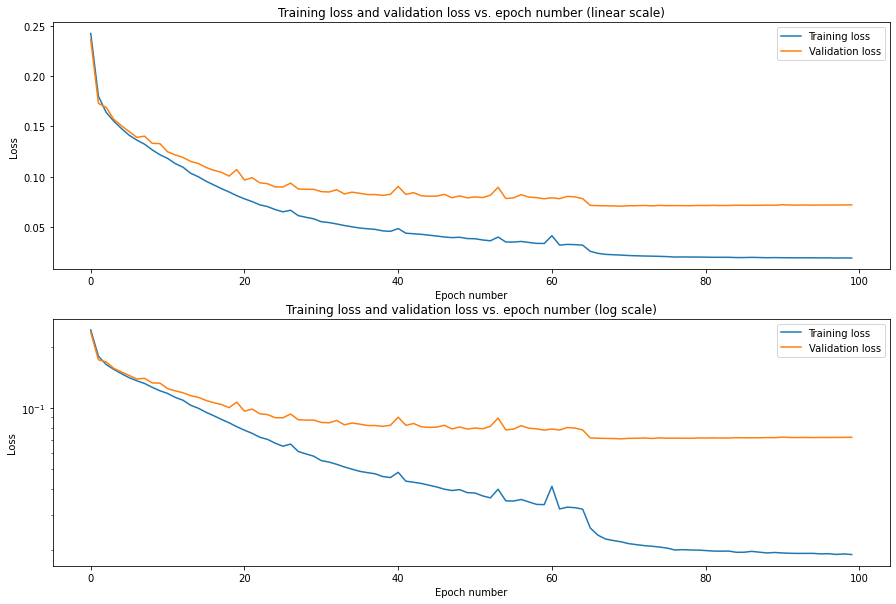

In [5]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number
import csv
from matplotlib import pyplot as plt

lossDataFromCSV = []
vallossDataFromCSV = []

with open(os.path.join(QC_model_path,'Quality Control/training_evaluation.csv'),'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(os.path.join(QC_model_path,'Quality Control/lossCurvePlots.png'))
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "QC_image_folder" using teh corresponding localization data contained in "QC_loc_folder" !

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map** 

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**





In [0]:

# ------------------------ User input ------------------------
#@markdown ##Choose the folders that contain your Quality Control dataset
QC_image_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/Simulated Test structures/ThunderSTORM simulation/Test image folder" #@param{type:"string"}
QC_loc_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/Simulated Test structures/ThunderSTORM simulation/Test localization folder" #@param{type:"string"}


# ------------------------ Definitions specific to QC ------------------------
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

# Normalization functions from Martin Weigert used in CARE
def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x


# ------------------------ QC analysis loop over provided dataset ------------------------

savePath = os.path.join(QC_model_path, 'Quality Control')

# Open and create the csv file that will contain all the QC metrics
with open(os.path.join(savePath, "QC_metrics.csv"), "w", newline='') as file:
  writer = csv.writer(file)

  # Write the header in the csv file
  writer.writerow(["image #","Prediction v. GT mSSIM","WF v. GT mSSIM", "Prediction v. GT NRMSE","WF v. GT NRMSE", "Prediction v. GT PSNR", "WF v. GT PSNR"])

  # These lists will be used to collect all the metrics values per slice
  file_name_list = []
  slice_number_list = []
  mSSIM_GvP_list = []
  mSSIM_GvWF_list = []
  NRMSE_GvP_list = []
  NRMSE_GvWF_list = []
  PSNR_GvP_list = []
  PSNR_GvWF_list = []

  # Let's loop through the provided dataset in the QC folders

  for (imageFilename, locFilename) in zip(os.listdir(QC_image_folder), os.listdir(QC_loc_folder)):
    if not os.path.isdir(os.path.join(QC_image_folder,imageFilename)):
      print('--------------')
      print(imageFilename)
      print(locFilename)

      # Get the prediction
      test_model(QC_image_folder, imageFilename, QC_model_path, savePath, display=False);
      thisPrediction = io.imread(os.path.join(savePath, 'Predicted_'+imageFilename))
      thisWidefield = io.imread(os.path.join(savePath, 'Widefield_'+imageFilename))

      Mhr = thisPrediction.shape[0]
      Nhr = thisPrediction.shape[1]

      pixel_size, N, M = getPixelSizeTIFFmetadata(os.path.join(QC_image_folder,imageFilename))
      # # Get the GT image from the localizations on the right pixel grid
      # with Image.open(os.path.join(QC_image_folder,imageFilename)) as img:
      #   meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.keys()}

      # N = meta_dict['ImageWidth'][0]
      # M = meta_dict['ImageLength'][0]

      # # TIFF tags
      # # https://www.loc.gov/preservation/digital/formats/content/tiff_tags.shtml
      # ResolutionUnit = meta_dict['ResolutionUnit'][0] # unit of resolution in metres (TBC)
      # xResolution = meta_dict['XResolution'][0][0] # number of pixels / ResolutionUnit
      # pixel_size = 1e9*ResolutionUnit/xResolution
      # print('Pixel size obtained from metadata: '+str(pixel_size)+' nm')

      upsampling_factor = int(Mhr/M)
      print('Upsampling factor: '+str(upsampling_factor))
      pixel_size_hr = pixel_size/upsampling_factor # in nm

      # Load the localization file and display the first
      LocData = pd.read_csv(os.path.join(QC_loc_folder,locFilename), index_col=0)

      locImage = np.zeros((Mhr,Nhr), dtype = np.float64)
      x = list(LocData['x [nm]'])
      y = list(LocData['y [nm]'])

      # Get the approximated locations according to the high-res grid pixel size
      Chr_emitters = [int(max(min(round(x[i]/pixel_size_hr),Nhr-1),0)) for i in range(len(x))]
      Rhr_emitters = [int(max(min(round(y[i]/pixel_size_hr),Mhr-1),0)) for i in range(len(y))]

      # Build Localization image
      for (r,c) in zip(Rhr_emitters, Chr_emitters):
        locImage[r][c] += 1

      # Save the loc image files
      io.imsave(os.path.join(savePath, 'GT_image_'+imageFilename), locImage)

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
      test_GT_norm, test_prediction_norm = norm_minmse(locImage, thisPrediction, normalize_gt=True)
      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
      test_GT_norm, test_wf_norm = norm_minmse(locImage, thisWidefield, normalize_gt=True)

      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
      index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, test_prediction_norm, data_range=1., full=True)
      index_SSIM_GTvsWF, img_SSIM_GTvsWF = structural_similarity(test_GT_norm, test_wf_norm, data_range=1., full=True)


      # Save ssim_maps
      img_SSIM_GTvsPrediction_32bit = np.float32(img_SSIM_GTvsPrediction)
      io.imsave(os.path.join(savePath,'SSIM_GTvsPrediction_'+imageFilename),img_SSIM_GTvsPrediction_32bit)
      img_SSIM_GTvsWF_32bit = np.float32(img_SSIM_GTvsWF)
      io.imsave(os.path.join(savePath,'SSIM_GTvsWF_'+imageFilename),img_SSIM_GTvsWF_32bit)
   
      # Calculate the Root Squared Error (RSE) maps
      img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
      img_RSE_GTvsWF = np.sqrt(np.square(test_GT_norm - test_wf_norm))

      # Save SE maps
      img_RSE_GTvsPrediction_32bit = np.float32(img_RSE_GTvsPrediction)
      io.imsave(os.path.join(savePath,'RSE_GTvsPrediction_'+imageFilename),img_RSE_GTvsPrediction_32bit)
      img_RSE_GTvsWF_32bit = np.float32(img_RSE_GTvsWF)
      io.imsave(os.path.join(savePath,'RSE_GTvsWF_'+imageFilename),img_RSE_GTvsWF_32bit)

      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
      NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
      NRMSE_GTvsWF = np.sqrt(np.mean(img_RSE_GTvsWF))
      
      # We can also measure the peak signal to noise ratio between the images
      PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
      PSNR_GTvsWF = psnr(test_GT_norm,test_wf_norm,data_range=1.0)

      writer.writerow([imageFilename,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsWF),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsWF),str(PSNR_GTvsPrediction), str(PSNR_GTvsWF)])

      # Collect values to display in dataframe output
      file_name_list.append(imageFilename)
      mSSIM_GvP_list.append(index_SSIM_GTvsPrediction)
      mSSIM_GvWF_list.append(index_SSIM_GTvsWF)
      NRMSE_GvP_list.append(NRMSE_GTvsPrediction)
      NRMSE_GvWF_list.append(NRMSE_GTvsWF)
      PSNR_GvP_list.append(PSNR_GTvsPrediction)
      PSNR_GvWF_list.append(PSNR_GTvsWF)


# Table with metrics as dataframe output
pdResults = pd.DataFrame(index = file_name_list)
pdResults["Prediction v. GT mSSIM"] = mSSIM_GvP_list
pdResults["Wide-field v. GT mSSIM"] = mSSIM_GvWF_list
pdResults["Prediction v. GT NRMSE"] = NRMSE_GvP_list
pdResults["Wide-field v. GT NRMSE"] = NRMSE_GvWF_list
pdResults["Prediction v. GT PSNR"] = PSNR_GvP_list
pdResults["Wide-field v. GT PSNR"] = PSNR_GvWF_list


# ------------------------ Display ------------------------

print('--------------------------------------------')
@interact
def show_QC_results(file=os.listdir(QC_image_folder)):

  plt.figure(figsize=(15,15))
  # Target (Ground-truth)
  plt.subplot(3,3,1)
  plt.axis('off')
  img_GT = io.imread(os.path.join(savePath, 'GT_image_'+file))
  plt.imshow(img_GT)
  plt.title('Target',fontsize=15)

  # Wide-field
  plt.subplot(3,3,2)
  plt.axis('off')
  img_Source = io.imread(os.path.join(savePath, 'Widefield_'+file))
  plt.imshow(img_Source, norm = simple_norm(img_Source, percent = 99.5))
  plt.title('Widefield',fontsize=15)

  #Prediction
  plt.subplot(3,3,3)
  plt.axis('off')
  img_Prediction = io.imread(os.path.join(savePath, 'Predicted_'+file))
  plt.imshow(img_Prediction, norm = simple_norm(img_Prediction, percent = 99.5))
  plt.title('Prediction',fontsize=15)

  #Setting up colours
  cmap = plt.cm.CMRmap

  #SSIM between GT and Source
  plt.subplot(3,3,5)
  #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  img_SSIM_GTvsWF = io.imread(os.path.join(savePath, 'SSIM_GTvsWF_'+file))
  imSSIM_GTvsWF = plt.imshow(img_SSIM_GTvsWF, cmap = cmap, vmin=0, vmax=1)
  plt.colorbar(imSSIM_GTvsWF,fraction=0.046, pad=0.04)
  plt.title('Target vs. Widefield',fontsize=15)
  plt.xlabel('mSSIM: '+str(round(pdResults.loc[file]["Wide-field v. GT mSSIM"],3)),fontsize=14)
  plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

  #SSIM between GT and Prediction
  plt.subplot(3,3,6)
  #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  img_SSIM_GTvsPrediction = io.imread(os.path.join(savePath, 'SSIM_GTvsPrediction_'+file))
  imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
  plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
  plt.title('Target vs. Prediction',fontsize=15)
  plt.xlabel('mSSIM: '+str(round(pdResults.loc[file]["Prediction v. GT mSSIM"],3)),fontsize=14)

  #Root Squared Error between GT and Source
  plt.subplot(3,3,8)
  #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  img_RSE_GTvsWF = io.imread(os.path.join(savePath, 'RSE_GTvsWF_'+file))
  imRSE_GTvsWF = plt.imshow(img_RSE_GTvsWF, cmap = cmap, vmin=0, vmax = 1)
  plt.colorbar(imRSE_GTvsWF,fraction=0.046,pad=0.04)
  plt.title('Target vs. Widefield',fontsize=15)
  plt.xlabel('NRMSE: '+str(round(pdResults.loc[file]["Wide-field v. GT NRMSE"],3))+', PSNR: '+str(round(pdResults.loc[file]["Wide-field v. GT PSNR"],3)),fontsize=14)
  plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

  #Root Squared Error between GT and Prediction
  plt.subplot(3,3,9)
  #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  img_RSE_GTvsPrediction = io.imread(os.path.join(savePath, 'RSE_GTvsPrediction_'+file))
  imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
  plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
  plt.title('Target vs. Prediction',fontsize=15)
  plt.xlabel('NRMSE: '+str(round(pdResults.loc[file]["Prediction v. GT NRMSE"],3))+', PSNR: '+str(round(pdResults.loc[file]["Prediction v. GT PSNR"],3)),fontsize=14)

print('--------------------------------------------')
pdResults.head()


# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1.a Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [0]:

# ------------------------------- User input -------------------------------
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.
Data_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 1 - Simulated Microtubules/Unseen data" #@param {type:"string"}
Result_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/Free style/Prediction from DNA-PAINT" #@param {type:"string"}

#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}
#@markdown  ###Otherwise, please provide path to the model folder below
prediction_model_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models/20200509_M3" #@param {type:"string"}

if (Use_the_current_trained_model): 
  prediction_model_path = os.path.join(model_path, model_name)

if os.path.exists(prediction_model_path):
  print("The "+os.path.basename(prediction_model_path)+" model will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path before proceeding further.')



# ------------------------------- Run predictions -------------------------------

start = time.time()
#%% This script tests the trained fully convolutional network based on the 
# saved training weights, and normalization created using train_model.

for filename in os.listdir(Data_folder):
  # run the testing/reconstruction process
  print("------------------------------------")
  print("Running prediction on: "+ filename)
  test_model(Data_folder, filename, prediction_model_path, Result_folder, display = False);

print('--------------------------------------------------------------------')
# Displaying the time elapsed for training
dt = time.time() - start
minutes, seconds = divmod(dt, 60) 
hours, minutes = divmod(minutes, 60) 
print("Time elapsed:",hours, "hour(s)",minutes,"min(s)",round(seconds),"sec(s)")


# ------------------------------- Interactive display -------------------------------
print('--------------------------------------------------------------------')

@interact
def show_QC_results(file=os.listdir(Data_folder)):

  plt.figure(figsize=(15,7.5))
  # Wide-field
  plt.subplot(1,2,1)
  plt.axis('off')
  img_Source = io.imread(os.path.join(Result_folder, 'Widefield_'+file))
  plt.imshow(img_Source, norm = simple_norm(img_Source, percent = 99.5))
  plt.title('Widefield',fontsize=15)
  # Prediction
  plt.subplot(1,2,2)
  plt.axis('off')
  img_Prediction = io.imread(os.path.join(Result_folder, 'Predicted_'+file))
  plt.imshow(img_Prediction, norm = simple_norm(img_Prediction, percent = 99.5))
  plt.title('Predicted',fontsize=15)




## **6.1.b Generate prediction(s) from unseen dataset using single-frame load (good for large dataset)**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [0]:

# ------------------------------- User input -------------------------------
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.
Data_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 1 - Simulated Microtubules/Unseen data" #@param {type:"string"}
Result_folder = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/Free style/Prediction from DNA-PAINT" #@param {type:"string"}

#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}
#@markdown  ###Otherwise, please provide path to the model folder below
prediction_model_path = "/content/gdrive/My Drive/Colab notebooks testing/DeepSTORM/demo 2 - Real Microtubules/Models/20200509_M3" #@param {type:"string"}

if (Use_the_current_trained_model): 
  prediction_model_path = os.path.join(model_path, model_name)

if os.path.exists(prediction_model_path):
  print("The "+os.path.basename(prediction_model_path)+" model will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path before proceeding further.')



# ------------------------------- Run predictions -------------------------------

start = time.time()
#%% This script tests the trained fully convolutional network based on the 
# saved training weights, and normalization created using train_model.

for filename in os.listdir(Data_folder):
  # run the testing/reconstruction process
  print("------------------------------------")
  print("Running prediction on: "+ filename)
  singleFramePrediction(Data_folder, filename, prediction_model_path, Result_folder)

print('--------------------------------------------------------------------')
# Displaying the time elapsed for training
dt = time.time() - start
minutes, seconds = divmod(dt, 60) 
hours, minutes = divmod(minutes, 60) 
print("Time elapsed:",hours, "hour(s)",minutes,"min(s)",round(seconds),"sec(s)")


# ------------------------------- Interactive display -------------------------------
print('--------------------------------------------------------------------')

@interact
def show_QC_results(file=os.listdir(Data_folder)):

  plt.figure(figsize=(15,7.5))
  # Wide-field
  plt.subplot(1,2,1)
  plt.axis('off')
  img_Source = io.imread(os.path.join(Result_folder, 'Widefield_'+file))
  plt.imshow(img_Source, norm = simple_norm(img_Source, percent = 99.5))
  plt.title('Widefield', fontsize=15)
  # Prediction
  plt.subplot(1,2,2)
  plt.axis('off')
  img_Prediction = io.imread(os.path.join(Result_folder, 'Predicted_'+file))
  plt.imshow(img_Prediction, norm = simple_norm(img_Prediction, percent = 99.5))
  plt.title('Predicted',fontsize=15)




## **6.2. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.


#**Thank you for using Deep-STORM 2D!**